In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set(style='darkgrid')

In [2]:
data=pd.read_csv(r"C:\Users\DELL\OneDrive\Desktop\Board_Infinity\4)BI_Python\BI_Project_2\Ecommerce_UK_Retailer.csv",encoding='latin1')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


# 1. Perform Basic EDA 

To perform basic Exploatory data analysis, first we need to do data preprocessing

# 2. Check for missing values in all columns and replace them with the appropriate metric (Mean/Median/Mode) 

In [3]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [4]:
data["Description"].fillna(data['Description'].mode()[0],inplace=True)
data["CustomerID"].fillna(data['CustomerID'].median(),inplace=True)

# 3. Remove duplicate rows 

In [5]:
data.drop_duplicates(keep='first',inplace=True)

# 4. Remove rows which have negative values in Quantity column 

In [6]:
data.drop(data[data['Quantity']<0].index,inplace=True)
data.shape

(526054, 8)

# 5. Add the columns - Month, Day and Hour for the invoice

In [7]:
data['Month'] = list(pd.DatetimeIndex(data['InvoiceDate']).month)
data['Day'] = list(pd.DatetimeIndex(data['InvoiceDate']).day)
data['Hour'] = list(pd.DatetimeIndex(data['InvoiceDate']).hour)
#data['Year'] = list(pd.DatetimeIndex(data['InvoiceDate']).year)

In [8]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Day,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,12,1,8
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,12,1,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,12,1,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,12,1,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,12,1,8


# 6. How many orders made by the customers? 

In [9]:
data.groupby(['CustomerID'])['StockCode'].count()

CustomerID
12346.0      1
12347.0    182
12348.0     31
12349.0     73
12350.0     17
          ... 
18280.0     10
18281.0      7
18282.0     12
18283.0    721
18287.0     70
Name: StockCode, Length: 4339, dtype: int64

# 7. TOP 5 customers with higher number of orders 

In [10]:
a=data.groupby(['CustomerID'])['StockCode'].count().sort_values(ascending=False)
a.iloc[0:5]

CustomerID
15152.0    133593
17841.0      7676
14911.0      5672
14096.0      5111
12748.0      4413
Name: StockCode, dtype: int64

# 8. How much money spent by the customers?

In [11]:
data['MoneySpent']=data['Quantity']*data['UnitPrice']

In [12]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Day,Hour,MoneySpent
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,12,1,8,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,12,1,8,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,12,1,8,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,12,1,8,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,12,1,8,20.34


In [13]:
print('Money spent by each customer')
data.groupby(['CustomerID'])['MoneySpent'].sum()

Money spent by each customer


CustomerID
12346.0    77183.60
12347.0     4310.00
12348.0     1797.24
12349.0     1757.55
12350.0      334.40
             ...   
18280.0      180.60
18281.0       80.82
18282.0      178.05
18283.0     2045.53
18287.0     1837.28
Name: MoneySpent, Length: 4339, dtype: float64

In [14]:
print('Total money spent by all customers = ',data['MoneySpent'].sum())

Total money spent by all customers =  10619986.684


# 9. TOP 5 customers with highest money spent 

In [15]:
Top_5_Highest_MoneySpent_Customers=data.groupby(['CustomerID'])['MoneySpent'].sum().sort_values(ascending=False)
Top_5_Highest_MoneySpent_Customers.iloc[0:5]

CustomerID
15152.0    1.737523e+06
14646.0    2.802060e+05
18102.0    2.596573e+05
17450.0    1.943908e+05
16446.0    1.684725e+05
Name: MoneySpent, dtype: float64

# 10. How many orders per month? 

In [16]:
OrdersPerMonth=data.groupby(['Month'])['StockCode'].count()
OrdersPerMonth

Month
1     34104
2     26961
3     35609
4     28957
5     36044
6     35793
7     38466
8     34347
9     48962
10    58629
11    82133
12    66049
Name: StockCode, dtype: int64

# 11. How many orders per day? 

In [17]:
OrdersPerDay=data.groupby(['Day'])['StockCode'].count()
OrdersPerDay

Day
1     17035
2     16232
3     14049
4     19026
5     21467
6     23248
7     22350
8     23935
9     17658
10    19334
11    17891
12    13618
13    17845
14    17489
15    15344
16    15217
17    22361
18    18522
19    12757
20    18603
21    18602
22    15785
23    17306
24    16331
25    15797
26    10246
27    14448
28    16676
29    11663
30    15069
31    10150
Name: StockCode, dtype: int64

# 12. How many orders per hour? 

In [18]:
OrdersPerHour=data.groupby(['Hour'])['StockCode'].count()
OrdersPerHour

Hour
6         1
7       379
8      8802
9     33738
10    47670
11    55592
12    76096
13    70067
14    65384
15    75851
16    53074
17    27498
18     7696
19     3428
20      778
Name: StockCode, dtype: int64

# 13. How many orders for each country?

In [19]:
OrdersEachCountry=data.groupby(['Country'])['StockCode'].count()
OrdersEachCountry

Country
Australia                 1184
Austria                    398
Bahrain                     18
Belgium                   2031
Brazil                      32
Canada                     151
Channel Islands            747
Cyprus                     603
Czech Republic              25
Denmark                    380
EIRE                      7883
European Community          60
Finland                    685
France                    8393
Germany                   9027
Greece                     145
Hong Kong                  280
Iceland                    182
Israel                     292
Italy                      758
Japan                      321
Lebanon                     45
Lithuania                   35
Malta                      112
Netherlands               2363
Norway                    1072
Poland                     330
Portugal                  1492
RSA                         58
Saudi Arabia                 9
Singapore                  222
Spain                     2480


# 14. Orders trend across months 

In [20]:
data2=pd.DataFrame(OrdersPerMonth)
data2.reset_index(inplace=True)
data2.head()

,Month,StockCode
0,1,34104
1,2,26961
2,3,35609
3,4,28957
4,5,36044


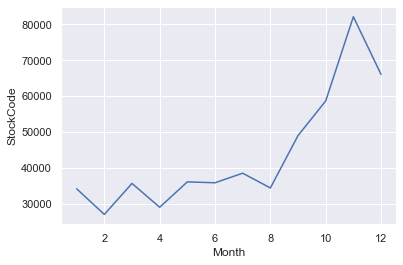

In [21]:
val=OrdersPerMonth.values
ind=OrdersPerMonth.index
sns.lineplot(y="StockCode", x="Month",data=data2)
plt.show()

# 15. How much money spent by each country?

In [22]:
MoneySpentEachCountry=data.groupby(['Country'])['MoneySpent'].sum()
MoneySpentEachCountry

Country
Australia               1.384538e+05
Austria                 1.019868e+04
Bahrain                 7.541400e+02
Belgium                 4.119634e+04
Brazil                  1.143600e+03
Canada                  3.666380e+03
Channel Islands         2.044054e+04
Cyprus                  1.350285e+04
Czech Republic          8.267400e+02
Denmark                 1.895534e+04
EIRE                    2.831405e+05
European Community      1.300250e+03
Finland                 2.254608e+04
France                  2.096254e+05
Germany                 2.286784e+05
Greece                  4.760520e+03
Hong Kong               1.548300e+04
Iceland                 4.310000e+03
Israel                  8.129410e+03
Italy                   1.748324e+04
Japan                   3.741637e+04
Lebanon                 1.693880e+03
Lithuania               1.661060e+03
Malta                   2.725590e+03
Netherlands             2.854463e+05
Norway                  3.616544e+04
Poland                  7.3346

# Exploratory Data Analysis

In [23]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Day,Hour,MoneySpent
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,12,1,8,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,12,1,8,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,12,1,8,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,12,1,8,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,12,1,8,20.34


## a. Boxplot – All Numeric Variables

In [24]:
Numericvar_df=data[['Quantity','UnitPrice','MoneySpent','Month']]

Dropping all the records which are greate and lesser than iqr range

In [25]:
Numericvar_df.drop(Numericvar_df[Numericvar_df['Quantity'] <-14].index,inplace=True)
Numericvar_df.drop(Numericvar_df[Numericvar_df['UnitPrice'] <-3].index,inplace=True)
Numericvar_df.drop(Numericvar_df[Numericvar_df['MoneySpent'] <-17].index,inplace=True)

c:\python\python38\lib\site-packages\pandas\core\frame.py:4162: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
c:\python\python38\lib\site-packages\pandas\core\frame.py:4162: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
c:\python\python38\lib\site-packages\pandas\core\frame.py:4162: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [26]:
Numericvar_df.drop(Numericvar_df[Numericvar_df['Quantity'] > 26].index,inplace=True)
Numericvar_df.drop(Numericvar_df[Numericvar_df['UnitPrice'] >10].index,inplace=True)
Numericvar_df.drop(Numericvar_df[Numericvar_df['MoneySpent'] >40].index,inplace=True)

c:\python\python38\lib\site-packages\pandas\core\frame.py:4162: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
c:\python\python38\lib\site-packages\pandas\core\frame.py:4162: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
c:\python\python38\lib\site-packages\pandas\core\frame.py:4162: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


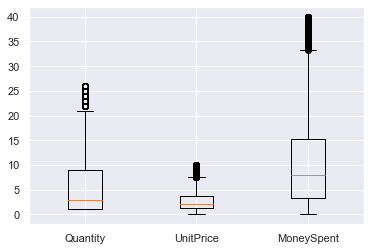

In [27]:
plt.boxplot(Numericvar_df[['Quantity','UnitPrice','MoneySpent']],labels=['Quantity','UnitPrice','MoneySpent'])
plt.show()

## b. Histogram – All Numeric Variables

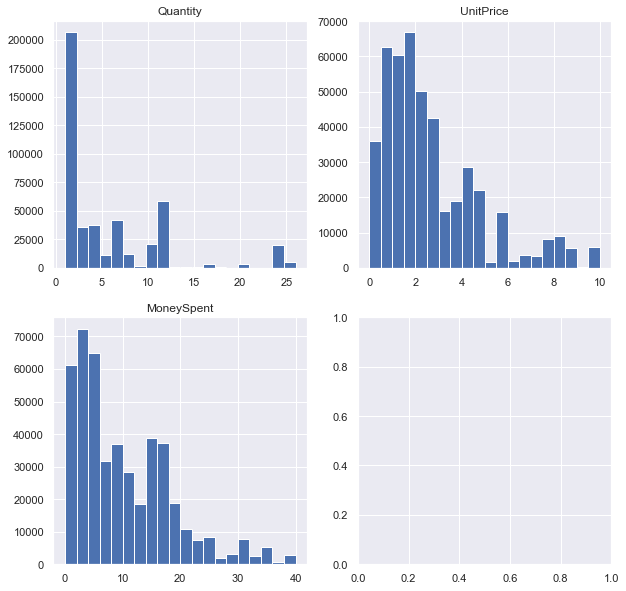

In [28]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
ax[0,0].hist(Numericvar_df['Quantity'],bins=20)
ax[0,0].set_title('Quantity')
ax[0,1].hist(Numericvar_df['UnitPrice'],bins=20)
ax[0,1].set_title('UnitPrice')
ax[1,0].hist(Numericvar_df['MoneySpent'],bins=20)
ax[1,0].set_title('MoneySpent')
plt.show()

## c. Distribution Plot – All Numeric Variables 

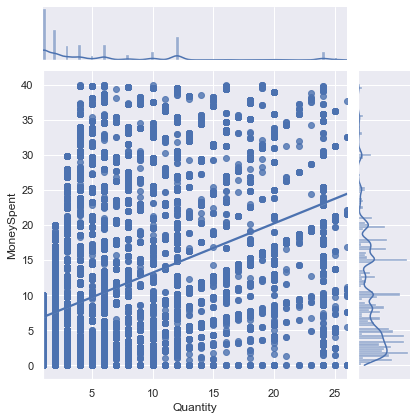

In [37]:
sns.jointplot(x='Quantity',y='MoneySpent',data=Numericvar_df, kind='reg');

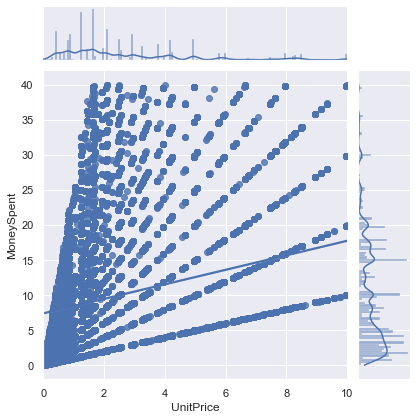

In [43]:
sns.jointplot(x='UnitPrice',y='MoneySpent',data=Numericvar_df,kind='reg');

## d. Aggregation for all numerical Columns 

In [29]:
Numericvar_df[['Quantity','UnitPrice','MoneySpent']].describe()

,Quantity,UnitPrice,MoneySpent
count,459414.000000,459414.000000,459414.000000
mean,5.745966,2.716949,10.205030
std,6.091881,2.172156,8.377788
min,1.000000,0.000000,0.000000
25%,1.000000,1.250000,3.300000
50%,3.000000,2.080000,7.950000
75%,9.000000,3.750000,15.300000
max,26.000000,10.000000,40.000000


## e. Unique Values across all columns

In [30]:
data.nunique()

InvoiceNo      20728
StockCode       3941
Description     4077
Quantity         393
InvoiceDate    19052
UnitPrice       1293
CustomerID      4339
Country           38
Month             12
Day               31
Hour              15
MoneySpent      4908
dtype: int64

## f. Duplicate values across all columns

In [66]:
new_df=pd.read_csv(r"C:\Users\DELL\OneDrive\Desktop\Board_Infinity\4)BI_Python\BI_Project_2\Ecommerce_UK_Retailer.csv",encoding='latin1')

In [69]:
new_df[new_df.duplicated()].count()

InvoiceNo      5268
StockCode      5268
Description    5268
Quantity       5268
InvoiceDate    5268
UnitPrice      5268
CustomerID     5225
Country        5268
dtype: int64

In [68]:
new_df[new_df.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,12/1/2010 11:49,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,12/9/2011 11:34,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,12/9/2011 11:34,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,12/9/2011 11:34,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,12/9/2011 11:34,2.10,14446.0,United Kingdom


## g. Correlation – Heatmap - All Numeric Variables

In [31]:
Numericvar_df.corr()

,Quantity,UnitPrice,MoneySpent,Month
Quantity,1.000000,-0.408575,0.511427,-0.019994
UnitPrice,-0.408575,1.000000,0.268464,-0.017830
MoneySpent,0.511427,0.268464,1.000000,-0.022360
Month,-0.019994,-0.017830,-0.022360,1.000000


<AxesSubplot:>

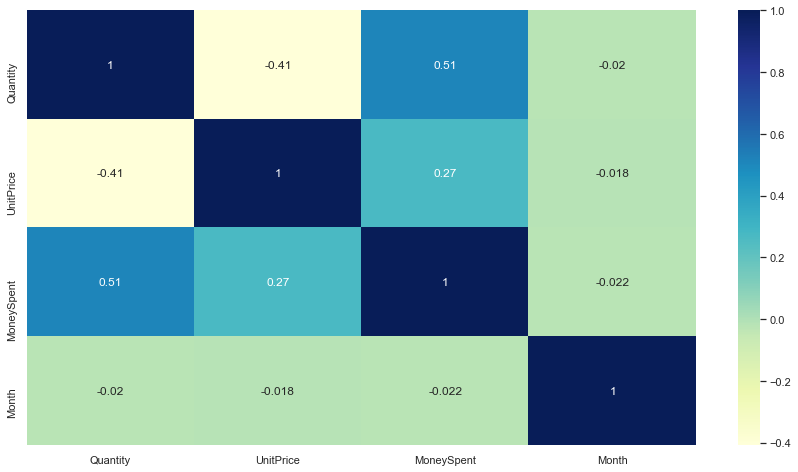

In [32]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(Numericvar_df.corr(), cmap="YlGnBu", annot=True)

## h. Regression Plot - All Numeric Variables

<AxesSubplot:xlabel='Quantity', ylabel='UnitPrice'>

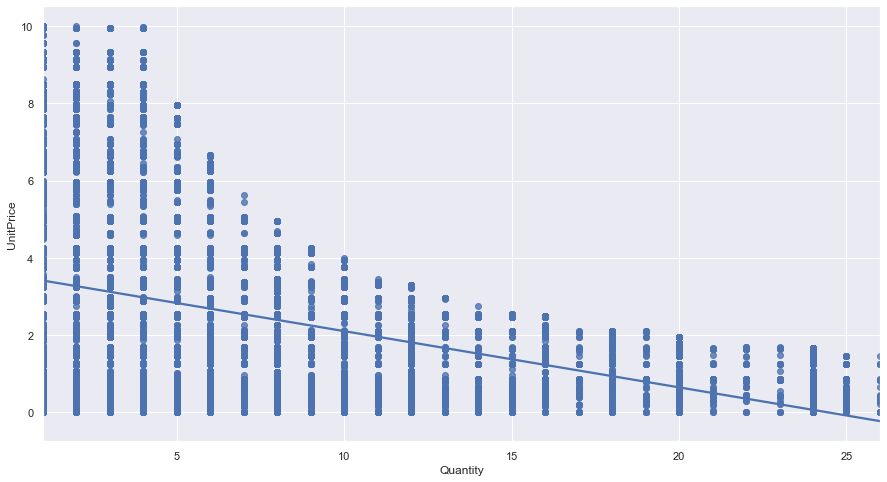

In [31]:
sns.regplot(x='Quantity',y='UnitPrice',data=Numericvar_df)

<AxesSubplot:xlabel='Quantity', ylabel='MoneySpent'>

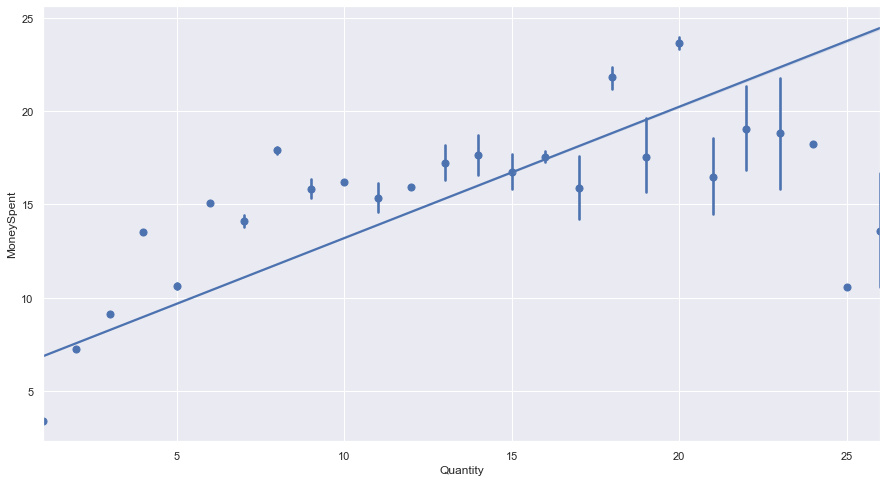

In [32]:
sns.regplot(x="Quantity", y="MoneySpent", data=Numericvar_df,x_estimator=np.mean)

## i. Bar Plot – Every Categorical Variable vs every Numerical Variable 

<AxesSubplot:xlabel='Quantity', ylabel='Country'>

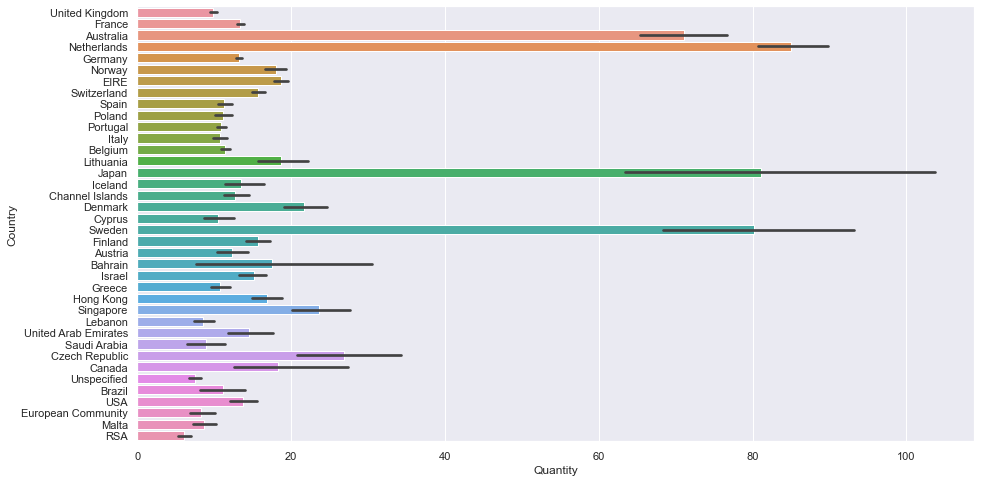

In [33]:
sns.barplot(y='Country',x='Quantity',data=data)

<AxesSubplot:xlabel='UnitPrice', ylabel='Country'>

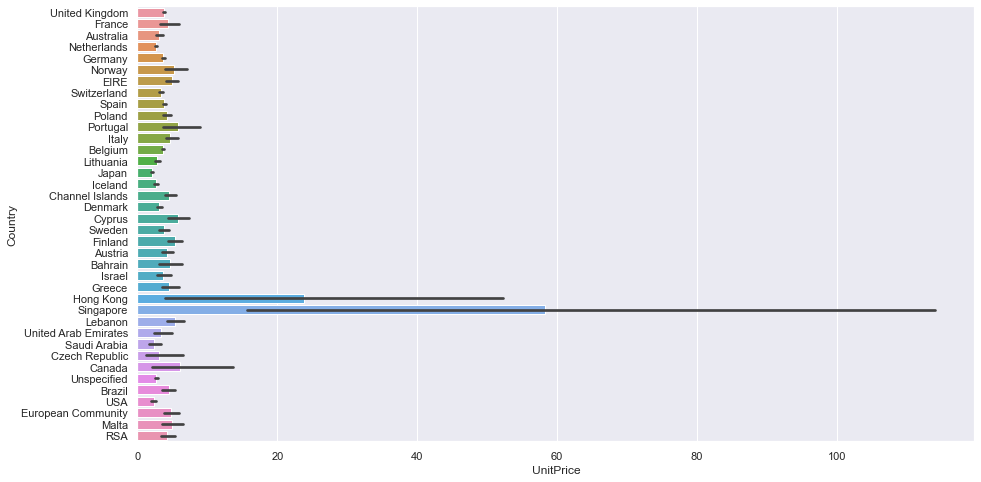

In [34]:
sns.barplot(y='Country',x='UnitPrice',data=data)

<AxesSubplot:xlabel='MoneySpent', ylabel='Country'>

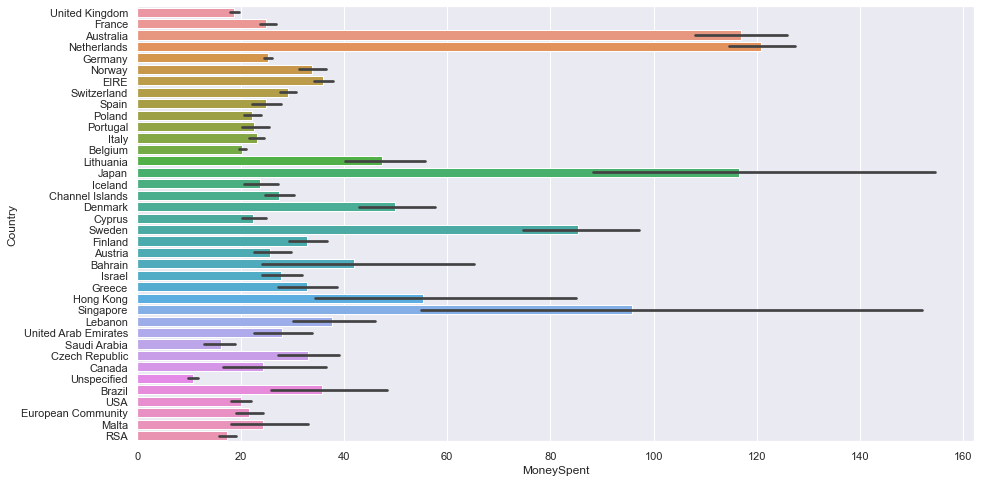

In [35]:
sns.barplot(y='Country',x='MoneySpent',data=data)

## j. Pair plot - All Numeric Variables 

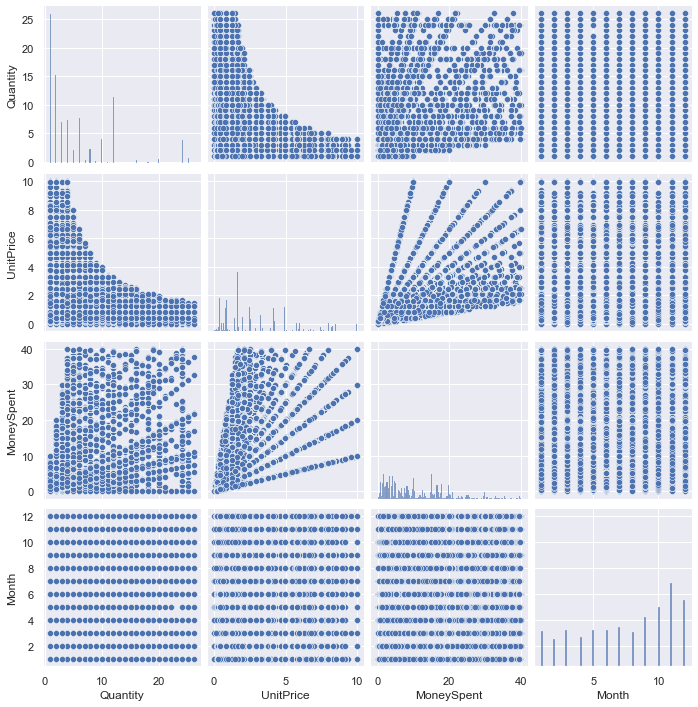

In [41]:
sns.pairplot(Numericvar_df)

## k. Line chart to show the trend of data - All Numeric/Date Variables

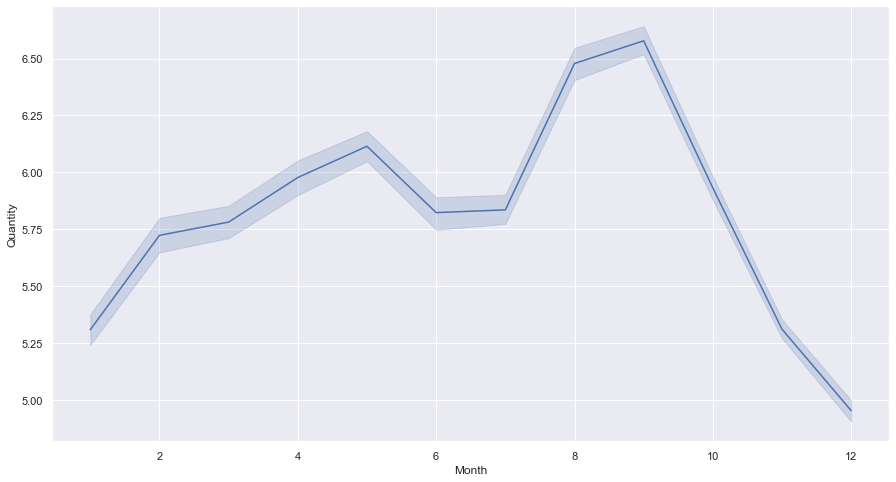

In [37]:
sns.lineplot(data=Numericvar_df, x="Month", y="Quantity");

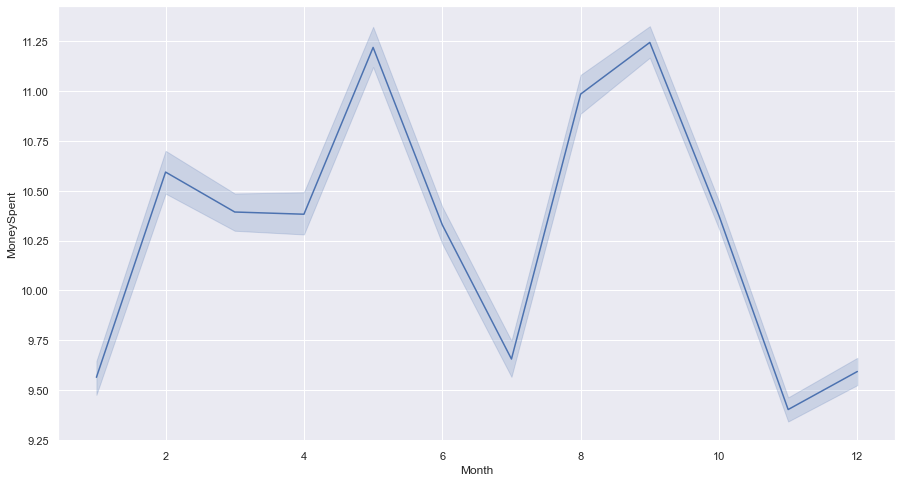

In [38]:
sns.lineplot(data=Numericvar_df, x="Month", y="MoneySpent");

## l. Plot the skewness - All Numeric Variables 

In [39]:
skeweddata=pd.DataFrame(Numericvar_df.skew(axis=1,skipna=True),columns=['Skewed Data'])

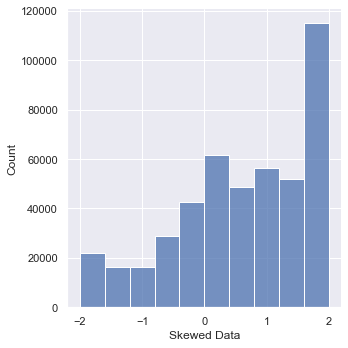

In [40]:
sns.displot(data=skeweddata, x=skeweddata['Skewed Data'], bins=10);